In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Input data type

In [3]:
zeroformat=True

In [72]:
dir = "/home/rita13santos/Desktop/6jun/run7"#1

Muninn format

In [73]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]

maxmonitorratio=[]

for var in vars:
    
    
    subdir = dir+"/{}.txt".format(var)

    
    print(subdir)
    
    if zeroformat==False: ## reading 2D data
        t=0
        with open(subdir) as f:
            for line in f:

                index = line.find("Time")

                if index==1:
                    t=t+1
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]


                else:

                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))

                    elif a==[]:


                        if k==1:
                            if t==1:
                                grid.append(auxgrid)
                            L=len(auxgrid)
                            m_ori.append(auxdata[3])
                            m_scri.append(auxdata[L-4])



                            monitor_ratio=[]
                            i=4
                            for m in auxdata[4:L-4]:
                                monitor_ratio.append(2*m/grid[0][i]*(1-grid[0][i]))
                                i=i+1
                            maxmonitorratio.append(np.max(monitor_ratio))




                        elif k==2:
                            beta_ori.append(auxdata[3])
                            beta_scri.append(auxdata[L-4])
                        elif k==3:
                            xi_ori.append(auxdata[3])
                            xi_scri.append(auxdata[L-4])
                        elif k==4:
                            derxi_ori.append(auxdata[3])
                            derxi_scri.append(auxdata[L-4])
                        elif k==5:
                            derderxi_ori.append(np.max(auxdata[3]))
    else: ## reading 0D data
        with open(subdir) as f:
            i=0
            for line in f:
                i=i+1
                a=line.split()
                #print("i = ", i, " a = ", a)
            
            
            
                #a=line.split()
            
                if k==1:
                    time.append(float(a[0]))
                    m_ori.append(float(a[1]))
                    m_scri.append(float(a[2]))
                elif k==2:
                    beta_ori.append(float(a[1]))
                    beta_scri.append(float(a[2]))
                elif k==3:
                    xi_ori.append(float(a[1]))
                    xi_scri.append(float(a[2]))
                elif k==4:
                    derxi_ori.append(float(a[1]))
                    derxi_scri.append(float(a[2]))
                elif k==5:
                    derderxi_ori.append(float(a[1]))
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/6jun/run7/m.txt
/home/rita13santos/Desktop/6jun/run7/beta.txt
/home/rita13santos/Desktop/6jun/run7/xi.txt
/home/rita13santos/Desktop/6jun/run7/derxi.txt
/home/rita13santos/Desktop/6jun/run7/derderxi.txt


In [55]:
maxmonitorratio=[]

time=[]
    
subdir = dir+"/monitorratio.txt".format(var)

    
print(subdir)
## reading 2D data
t=0

with open(subdir) as f:
    for line in f:
        
        index = line.find("Time")

        if index==1:
            t=t+1
            
            time.append(float(line[index+7:len(line)-1]))
            
            auxgrid=[]
            auxdata=[]


        else:

            a=line.split()
            if a!=[]:
                
                auxgrid.append(float(a[0]))
                auxdata.append(float(a[1]))

            elif a==[]:


                    
                if t==1:
                    grid.append(auxgrid)
                L=len(auxgrid)

                maxmonitorratio.append(np.max(auxdata))
                    
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/6jun/run4/monitorratio.txt


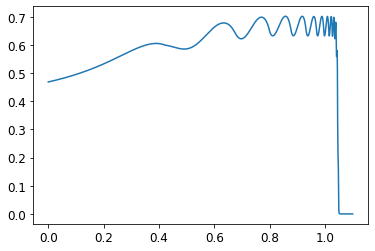

In [25]:
len(maxmonitorratio)
time
plt.plot(time,maxmonitorratio)

####

In [124]:
maxmonitorratio[0]

IndexError: list index out of range

# Styling plots

In [95]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':18,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [96]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
"""def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)"""
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.exp(np.multiply(beta_scri,2)), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

NameError: name 'time' is not defined

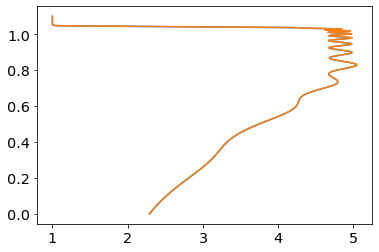

In [76]:
y=converttobondi(time,beta_scri)


dy=[]
edoisbeta=[]
for i in range(0, len(y)-1):
    dd=(y[i+1]-y[i])/(time[i+1]-time[i])
    dy.append(dd)
    edoisbeta.append(np.exp(2*beta_scri[i]))
    
plt.plot(dy,time[0:len(dy)])
plt.plot(edoisbeta,time[0:len(dy)])
#dy/dtime==e2beta

#print(dy)
#print(edoisbeta)

# Chi at origin

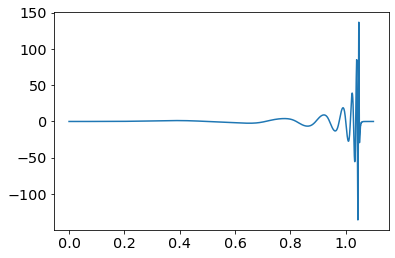

In [77]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [78]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""

k=6

tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  13

Tau star is  1.0538288177267743
Tau* is u* in my report

Delta is  0.7362096826737761


In [79]:
#Delta=0.0056891342535339
#tau_star=1.05547653827654878

In [80]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

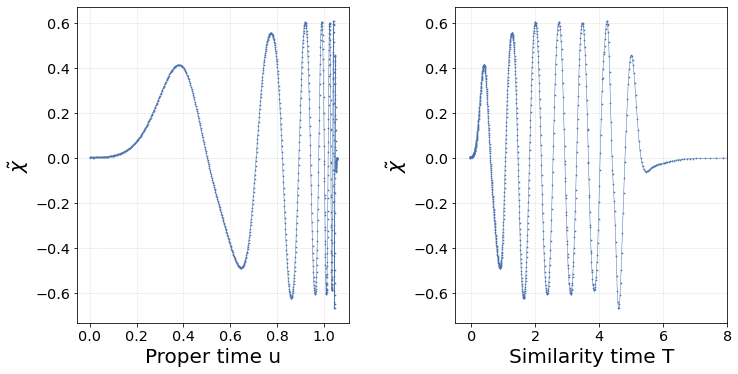

In [81]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'

    plt.rcParams['font.size'] = 12
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    ax2.scatter(adapt_time,chitilde,s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

Compactness

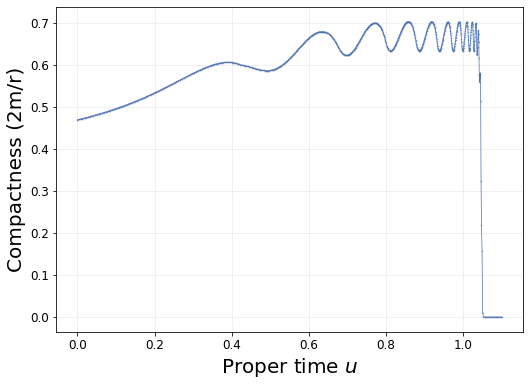

In [27]:


with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.plot(time,maxmonitorratio,linewidth=0.7)
    plt.scatter(time,maxmonitorratio,s=0.2,alpha=0.8)
    #plt.plot(converttobondi(time,beta_scri),maxmonitorratio,linewidth=0.5)
    #plt.scatter(converttobondi(time,beta_scri),maxmonitorratio,s=0.2,alpha=0.8)
    
    #plt.xlim(-0.01, 0.165)
    #plt.ylim(0.7, 0.72)
    plt.xlabel("Proper time $u$",fontsize=20)#$\u03C4$")
    plt.ylabel("Compactness (2m/r)",fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

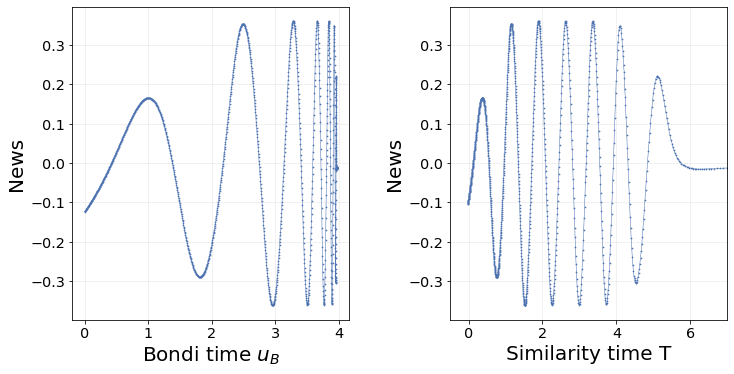

In [94]:
news=[]
for i in range(0, len(xi_scri)-1):
    
    #these look flat
    new=np.sqrt(2)*np.exp(2*beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(bonditime[i+1]-bonditime[i])#*
    new=np.sqrt(2)*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])#*
    
    
    #new=np.sqrt(1/(-4*math.pi) *np.exp(-2*beta_scri[i])*(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i]))#*
    news.append(new)
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'


    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax1.scatter(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],s=0.5)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=20)
    ax1.set_ylabel("News",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.plot(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel("News",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5,7])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

m at scri+

/tmp/ipykernel_25235/3079388286.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([0.0001,0.0000])


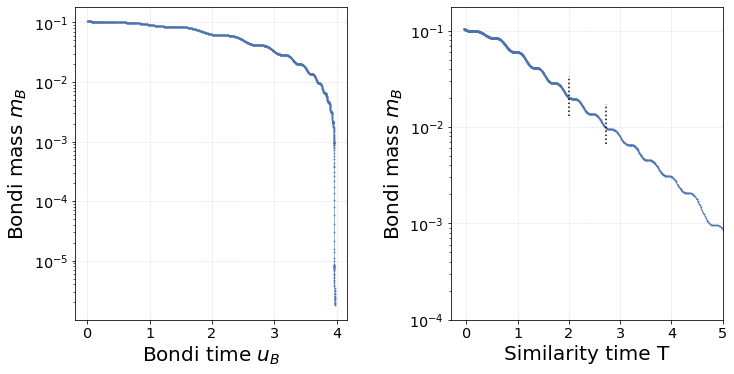

In [140]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    
    # time
    ax1.scatter(bonditime[0:len(mplt)],mplt[0:len(mplt)],s=0.5)
    ax1.plot(bonditime[0:len(mplt)],mplt[0:len(mplt)],linewidth=0.5)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([3.85,4])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    
    # adapt time
    
    ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    ax2.set_xlim([-0.3,5])
    ax2.set_ylim([0.0001,0.0000])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.axvline(2,0.65,0.78,color='k',linestyle='dotted')
    ax2.axvline(2.73,0.56,0.69,color='k', linestyle='dotted')

    fig.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [160]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-8*math.exp(-4*beta_scri[i])*math.pi*deruxi[i]**2#this is m,ub, so its eq:masslossanalyticalym but translated to bondi
    #-8*math.exp(-2*beta_scri[i])*math.pi*deruxi[i]**2
    massloss.append(aux)



In [161]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(bonditime[i+1]-bonditime[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

In [162]:
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      
#E24A33

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


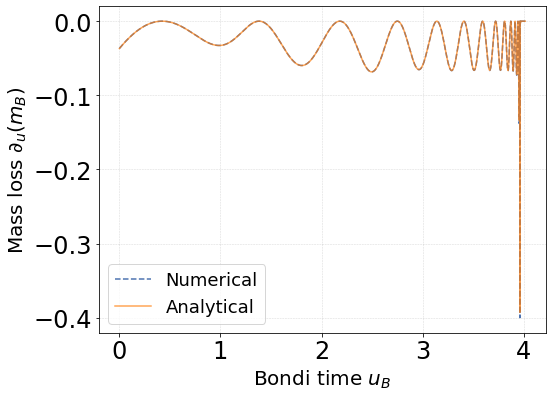

In [169]:

with plt.style.context('seaborn-v0_8-deep'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 20
    plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1.5,linestyle="dashed")
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1.5,alpha=0.7,color='#ff7f0e')
    
    #plt.xlim(-0.01, 0.165)
    plt.xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

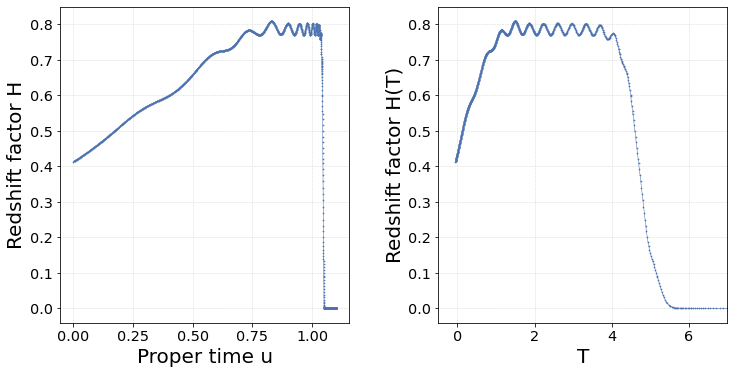

In [170]:
redshift=[]
for i in range(0, len(beta_scri)):
    #redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1)
    #redshift.append(math.exp(2*beta_scri[i])-1)
    redshift.append(beta_scri[i])
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)#"$\u03C4$")
    ax1.set_ylabel("Redshift factor H",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],s=0.5)
    ax2.set_xlim([-0.5,7])
    ax2.set_xlabel("T",fontsize=20)
    ax2.set_ylabel("Redshift factor H(T)",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [90]:
ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)

IndentationError: unexpected indent (124731751.py, line 2)

Bondi mass at scri+

In [ ]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('seaborn-v0_8-deep'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.show()

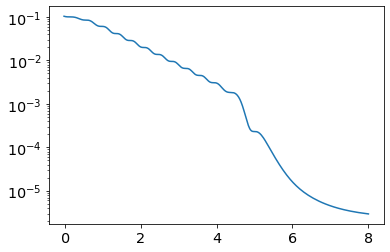

In [91]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

# Mass Scaling

In [4]:
from scipy.optimize import curve_fit

In [22]:
dir = "/home/rita13santos/Desktop/6jun"#1


In [66]:
masses=[]
amplitudes=[]




subdir = dir+"/parameters2.csv"


    

import csv

with open(subdir) as f:
    i=0
    
    reader = csv.DictReader(f)
    
    for row in reader:
        
        print("A* ", row['Column2'], "mass ", row['Column8'])
        amplitudes.append(float(row['Column2']))
        masses.append(float(row['Column8']))


A*  0.08864099550907109 mass  0.0
A*  0.08864099550907109 mass  0.0
A*  0.08864099551238547 mass  0.0
A*  0.08864099551784994 mass  0.0
A*  0.08864099552685935 mass  0.0
A*  0.08864099554171334 mass  0.0
A*  0.08864099556620345 mass  0.0012732194210713923
A*  0.0886409956065808 mass  0.0018218267212426853
A*  0.08864099567315178 mass  0.0021883001465992907
A*  0.08864099578290881 mass  0.0025558839852811697
A*  2.1743595536651297e9 mass  0.0
A*  0.08864099626221804 mass  0.00310811902778121
A*  0.08864099675411487 mass  0.003569260110280827
A*  0.08864099756511562 mass  0.0038468927534141707
A*  0.08864099890222982 mass  0.004310654109647128
A*  0.08864100110675843 mass  0.004682730977977733


In [80]:
masses=[0.0012732194210713923,
 0.0018218267212426853,
 0.0021883001465992907,
 0.0025558839852811697,
 0.00310811902778121,
 0.003569260110280827,
 0.0038468927534141707,
 0.004310654109647128,
 0.004682730977977733]+[0.007021208573111742,
 0.007776356396449991,
 0.008534110908021494,
 0.009390237218766303,
 0.010442923227081086,
 0.01150116424238681,
 0.012662480184685748,
 0.013831916398949453,
 0.0155972233578369,
 0.017082333047972624,
 0.018679155787222186,
 0.020490122489609488,
 0.02303605218527212,
 0.025202412682073575,
 0.027600974006300738]+[0.03002889439380779,
 0.03345917881255352,
 0.03694941500550924,
 0.04084039583193432,
 0.04503415305737698,
 0.04687410780380682,
 0.054887465804370976,
 0.06247420983095015,
 0.07124518819904598,
 0.08092700685490754,
 0.08530820750383977,
 0.10874130864352868,
 0.13322831900633306,
 0.15899085843207741,
 0.1718628170036847,
 0.21575627304850623,
 0.28100669282884977,
 0.3940732502679985,
 0.6185609102066362,
 1.1035158127183151]
amplitudes=[0.08864099556620345,
 0.0886409956065808,
 0.08864099567315178,
 0.08864099578290881,
 0.08864099626221804,
 0.08864099675411487,
 0.08864099756511562,
 0.08864099890222982,
 0.08864100110675843]+[0.08864103690333919,
 0.08864106375999577,
 0.08864110803913672,
 0.08864118104309826,
 0.0886413014062825,
 0.08864149985162456,
 0.0886418270326811,
 0.08864236646304838,
 0.08864325583336898,
 0.08864472215713408,
 0.08864713971631533,
 0.08865112559756062,
 0.08865769720475224,
 0.08866853195331174,
 0.08868639543372449]+[0.0887158473338497,
 0.08876440530804867,
 0.08884446387297264,
 0.08897645813186451,
 0.08919407987410984,
 0.08955287746951651,
 0.09014443469693957,
 0.09111974768062836,
 0.09272776694242607,
 0.09537894250304746,
 0.0997499920422043,
 0.10695663439269618,
 0.11883837892628049,
 0.13842806387182593,
 0.1707259941278608,
 0.22397627874057469,
 0.31177115565239183,
 0.4565204366754043,
 0.6951716552165954,
 1.088640995503962]

In [59]:
amplitudes=amplitudes[1:len(amplitudes)]
masses=masses[1:len(masses)]

/tmp/ipykernel_7587/2329336951.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, fit_eval, 'r-',label=r'fit: $\gamma$=%5.4f, c=%5.4f' % tuple(popt),linewidth=1.5,alpha=0.7,color='#1f77b4')


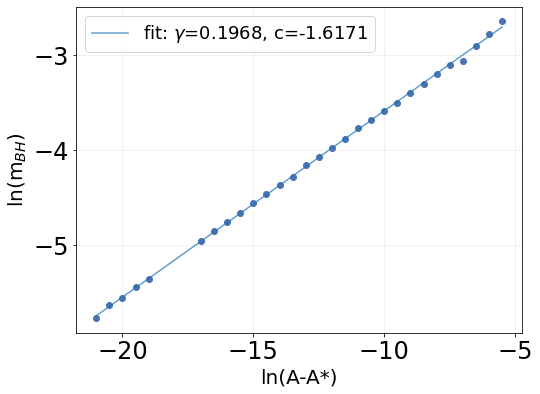

[ 0.19682442 -1.61711705]


0.19682441954487537

In [118]:

Astar=0.0886409955039620
xx=[]
yy=[]

i=0
for x in amplitudes:

    xx.append(math.log(x-Astar))
    yy.append(math.log(masses[i]))
    i=i+1
        
xx=xx[4:len(xx)-11]
yy=yy[4:len(yy)-11]




def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy)

fit_eval=[]
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))

    

with plt.style.context('seaborn-v0_8-deep'):
    #plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 20
    plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy)
    
    plt.plot(xx, fit_eval, 'r-',label=r'fit: $\gamma$=%5.4f, c=%5.4f' % tuple(popt),linewidth=1.5,alpha=0.7,color='#1f77b4')
    
    plt.xlabel("ln(A-A*)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()



print(popt)
popt[0]

In [80]:
masses

[0.0012732194210713923,
 0.0018218267212426853,
 0.0021883001465992907,
 0.0025558839852811697,
 0.00310811902778121,
 0.003569260110280827,
 0.0038468927534141707,
 0.004310654109647128,
 0.004682730977977733]